# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:777]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="https://www.exchange-rates.org/" />\r\n<meta name="description" content="View a table of historical Indonesian Rupiah exchange rates against the US Dollar.  You may also export this information to Excel or another spreadsheet program." />\r\n<met'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
table = soup.find(
    'table', 
    attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'}
)
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    1/6/2023
   </td>
   <td>
    Friday
   </td>
   <td>
    <a href="/Rate/USD/IDR/1-6-2023">
     15,607.20000
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/1-6-2023">
     USD IDR rate for 1/6/2023
    </a>
   </td>
  </tr>
  <tr>
   <td>
    1/5/2023
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/1


Finding row length.

In [5]:
tr = table.find_all('tr')
tr[:2]

[<tr><td>1/6/2023</td><td>Friday</td><td><a href="/Rate/USD/IDR/1-6-2023">15,607.20000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/1-6-2023">USD IDR rate for 1/6/2023</a></td></tr>,
 <tr><td>1/5/2023</td><td>Thursday</td><td><a href="/Rate/USD/IDR/1-5-2023">15,635.20000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/1-5-2023">USD IDR rate for 1/5/2023</a></td></tr>]

Do the scrapping process here (please change this markdown with your explanation)

In [6]:
temp = [] #initiating a tuple

for i in range(len(tr)):
    row = table.find_all('tr')[i]
    
    #get date
    period = row.find_all('td')[0].text
    period = period.strip() #for removing the excess whitespace
    
    #get exchange rate
    ex_rate = row.find_all('td')[2].text
    ex_rate = ex_rate.strip() #for removing the excess whitespace
    
    temp.append((period,ex_rate))
    
temp = temp[::-1]
print(temp[:10])
len(temp)

[('7/11/2022', '15,010.52059 IDR'), ('7/12/2022', '14,984.00000 IDR'), ('7/13/2022', '15,030.45000 IDR'), ('7/14/2022', '15,045.60000 IDR'), ('7/15/2022', '14,996.35000 IDR'), ('7/18/2022', '14,981.10000 IDR'), ('7/19/2022', '14,960.85000 IDR'), ('7/20/2022', '14,976.15000 IDR'), ('7/21/2022', '15,015.55000 IDR'), ('7/22/2022', '14,978.00000 IDR')]


130

## Creating data frame & Data wrangling

Put the array into dataframe

In [7]:
import pandas as pd

df = pd.DataFrame(temp, columns=['date', 'exchange_rate'])
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           130 non-null    object
 1   exchange_rate  130 non-null    object
dtypes: object(2)
memory usage: 2.2+ KB
None


,date,exchange_rate
0,7/11/2022,"15,010.52059 IDR"
1,7/12/2022,"14,984.00000 IDR"
2,7/13/2022,"15,030.45000 IDR"
3,7/14/2022,"15,045.60000 IDR"
4,7/15/2022,"14,996.35000 IDR"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [8]:
df['date'] = df['date'].astype('datetime64')
df['exchange_rate'] = df['exchange_rate'].apply(lambda x : x.split(' ')[0])
df['exchange_rate'] = df['exchange_rate'].str.replace(',', '')
df['exchange_rate'] = df['exchange_rate'].astype(float)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           130 non-null    datetime64[ns]
 1   exchange_rate  130 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 KB
None


,date,exchange_rate
0,2022-07-11,15010.52059
1,2022-07-12,14984.00000
2,2022-07-13,15030.45000
3,2022-07-14,15045.60000
4,2022-07-15,14996.35000


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

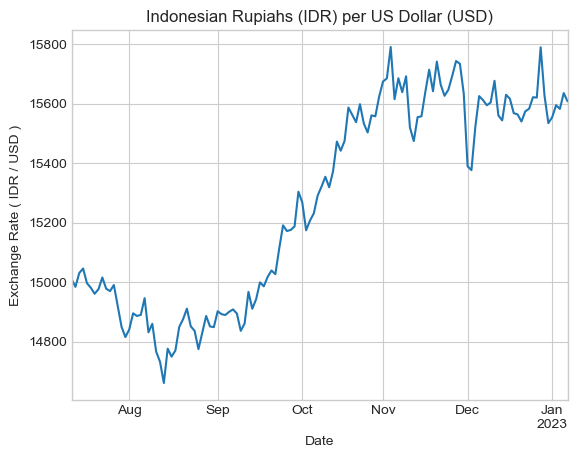

In [10]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
df.set_index('date').plot()
plt.legend().remove()
plt.title('Indonesian Rupiahs (IDR) per US Dollar (USD)')
plt.ylabel('Exchange Rate ( IDR / USD )')
plt.xlabel('Date')
plt.show()

The Indonesian Rupiah experienced significant fluctuations in its exchange rate against the US Dollar from July 2022 to January 2023. In July, the rate began at around 15,000 Rupiah per US Dollar. However, in mid-August, there was a drop in the exchange rate, causing it to fall below 14,800 Rupiah per US Dollar. The Rupiah's value began to recover in the following months, with the exchange rate reaching a peak of 15,800 Rupiah per US Dollar in November. From November to January 2023, the exchange rate fluctuated around an average price of 15,600 Rupiah per US Dollar. Overall, the line plot of the Rupiah's exchange rate against the US Dollar showed a general trend of increasing value for the Rupiah.

In [12]:
min_rate = df['exchange_rate'].min()
avg_rate = df['exchange_rate'].mean()
max_rate = df['exchange_rate'].max()
print(f"Min Rate: IDR {min_rate} on {df.loc[df['exchange_rate'] == min_rate, 'date'].astype(str).values}")
print(f"Min Rate: IDR {avg_rate}")
print(f"Min Rate: IDR {max_rate} on {df.loc[df['exchange_rate'] == max_rate, 'date'].astype(str).values}")

Min Rate: IDR 14661.07616 on ['2022-08-12']
Min Rate: IDR 15267.935392692307
Min Rate: IDR 15790.0 on ['2022-11-03']


The Indonesian Rupiah exchange rate against the US Dollar had several notable fluctuations over the specified time period. On August 12, 2022, the exchange rate reached its minimum value at 14,661.07 Rupiah per US Dollar. However, the rate later recovered, with the minimum value increasing to 15,267.93 Rupiah per US Dollar. In November 2022, the exchange rate reached its highest minimum value at 15,790 Rupiah per US Dollar on November 3. These fluctuations in the exchange rate suggest a dynamic and potentially volatile market for the Indonesian Rupiah.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.